In [108]:
import pandas as pd
import yfinance as yf
import investpy
import datetime as dt
import statsmodels.api as sm
import statsmodels
from pmdarima.arima import auto_arima
from arch.unitroot import ADF, KPSS, PhillipsPerron

from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import plotly_express as px

In [2]:
# Fetching Niftybees data

list_yf = ["NIFTYBEES.NS"]
start_date = dt.date.today() - dt.timedelta(days=365*10) # start date
end_date = dt.date.today() # End date
niftybees = yf.download(tickers=list_yf, start=start_date, end=end_date)['Adj Close']
niftybees

[*********************100%%**********************]  1 of 1 completed


Date
2014-09-18     82.043999
2014-09-19     82.126999
2014-09-22     82.592003
2014-09-23     81.424004
2014-09-24     81.141998
                 ...    
2024-09-09    277.679993
2024-09-10    279.200012
2024-09-11    277.540009
2024-09-12    282.709991
2024-09-13    283.190002
Name: Adj Close, Length: 2461, dtype: float64

In [8]:
niftybees_pct = (niftybees.pct_change()*100).dropna()
niftybees_pct

Date
2014-09-19    0.101165
2014-09-22    0.566201
2014-09-23   -1.414180
2014-09-24   -0.346342
2014-09-25   -1.115327
                ...   
2024-09-09   -0.050398
2024-09-10    0.547400
2024-09-11   -0.594557
2024-09-12    1.862788
2024-09-13    0.169789
Name: Adj Close, Length: 2460, dtype: float64

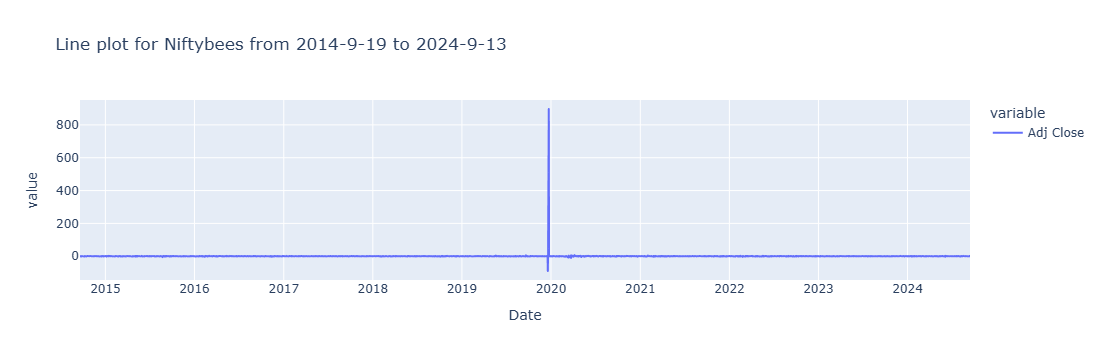

In [19]:
fig = px.line(
    niftybees_pct,
    title=f"Line plot for Niftybees from {niftybees_pct.index[0].year}-{niftybees_pct.index[0].month}-{niftybees_pct.index[0].day} to {niftybees_pct.index[-1].year}-{niftybees_pct.index[-1].month}-{niftybees_pct.index[-1].day}"
)
fig.show()

In [23]:
niftybees_pct.describe()

count    2460.000000
mean        0.382725
std        18.197358
min       -89.926810
25%        -0.397100
50%         0.090481
75%         0.573309
max       896.854294
Name: Adj Close, dtype: float64

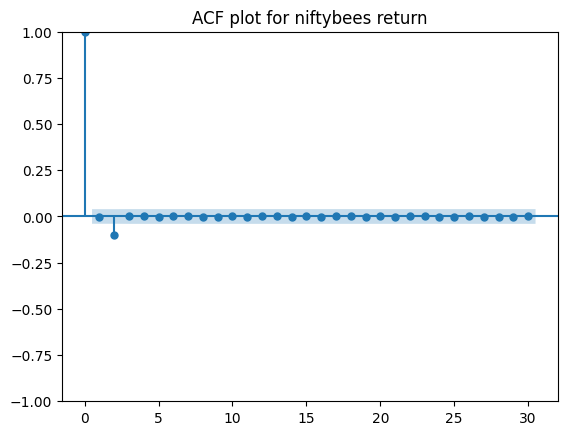

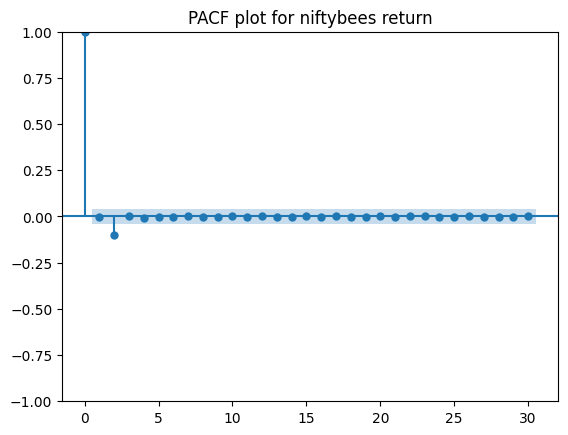

In [29]:
#fig,ax = plt.subplots(1,2, figsize=(18,7))

sm.graphics.tsa.plot_acf(niftybees_pct,title="ACF plot for niftybees return", lags=30)

sm.graphics.tsa.plot_pacf(niftybees_pct,title="PACF plot for niftybees return", lags=30);

In [70]:
#Test for stationarity
#1. Unit root test
#without drift and trend
adf_no = ADF(niftybees_pct, trend="n", method="aic")
print(adf_no)
print(adf_no.regression.summary())

   Augmented Dickey-Fuller Results   
Test Statistic                -38.733
P-value                         0.000
Lags                                1
-------------------------------------

Trend: No Trend
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.505
Model:                            OLS   Adj. R-squared (uncentered):              0.505
Method:                 Least Squares   F-statistic:                              1253.
Date:                Mon, 16 Sep 2024   Prob (F-statistic):                        0.00
Time:                        15:59:29   Log-Likelihood:                         -10608.
No. Observations:                2458   AIC:                                  2.122e+04
Df Residuals:  

In [72]:

#with trend and drift
adf_drift = ADF(niftybees_pct, trend="ct", method="aic")
print(adf_drift)
print(adf_drift.regression.summary())

   Augmented Dickey-Fuller Results   
Test Statistic                -38.746
P-value                         0.000
Lags                                1
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     835.8
Date:                Mon, 16 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:03:08   Log-Likelihood:                -10607.
No. Observations:                2458   AIC:                         2.122e+04
Df Residuals:                    2454   BIC:            

In [ ]:
# here both constant and trend are not sttaistically significant

In [78]:
#PhillipsPerron test

pp_test = PhillipsPerron(niftybees_pct)

print(pp_test)


     Phillips-Perron Test (Z-tau)    
Test Statistic                -49.887
P-value                         0.000
Lags                               27
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [91]:
#We can reject teh null hypothesis using both of teh statistcial test. Therefore, niftybees return are showing weekly stationary property.

In [80]:
auto_arima(
    niftybees_pct,  # stepwise=False,
    start_p=0,
    start_d=0,
    start_q=0,
    max_p=3,
    max_d=3,
    max_q=3,
    trace=True,
#    with_intercept=False,
    return_valid_fits=True,
)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=21258.457, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=21260.456, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=21260.456, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=21257.546, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=21255.505, Time=1.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=21239.680, Time=0.53 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=21237.683, Time=0.17 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=21239.682, Time=0.24 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=21241.681, Time=0.94 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=21237.014, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=21259.546, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=21239.010, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=21239.007, Time=0.20 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=21254.870, Time=0.34 sec
 ARIMA(3,0,1)(0,0,0

In [85]:
model1 = statsmodels.tsa.arima.model.ARIMA(niftybees_pct, order=(2,0,0),trend="n").fit()
model1.summary()

C:\Users\Uday Khanna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Uday Khanna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Uday Khanna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 2460
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -10615.507
Date:                Mon, 16 Sep 2024   AIC                          21237.014
Time:                        16:20:11   BIC                          21254.437
Sample:                             0   HQIC                         21243.344
                               - 2460                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0003      2.738     -0.000      1.000      -5.367       5.367
ar.L2         -0.0996      0.004    -23.445      0.000      -0.108      -0.091
sigma2       328.1319      0.408    804.645      0.000     327.333     328.931
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):         565016398.05
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                            47.90
Prob(H) (two-sided):                  0.34   Kurtosis:                      2348.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [87]:
fit_model1 = model1.fittedvalues

In [89]:
orig_fit_model1 = pd.DataFrame([niftybees_pct,fit_model1]).T
orig_fit_model1.columns = ["Original_niftybees","Fitted_niftybees"]
orig_fit_model1

Original_niftybees  Fitted_niftybees
Date                                            
2014-09-19            0.101165          0.000000
2014-09-22            0.566201         -0.000029
2014-09-23           -1.414180         -0.010253
2014-09-24           -0.346342         -0.055924
2014-09-25           -1.115327          0.140916
...                        ...               ...
2024-09-09           -0.050398          0.030385
2024-09-10            0.547400          0.092684
2024-09-11           -0.594557          0.004844
2024-09-12            1.862788         -0.054313
2024-09-13            0.169789          0.058605

[2460 rows x 2 columns]

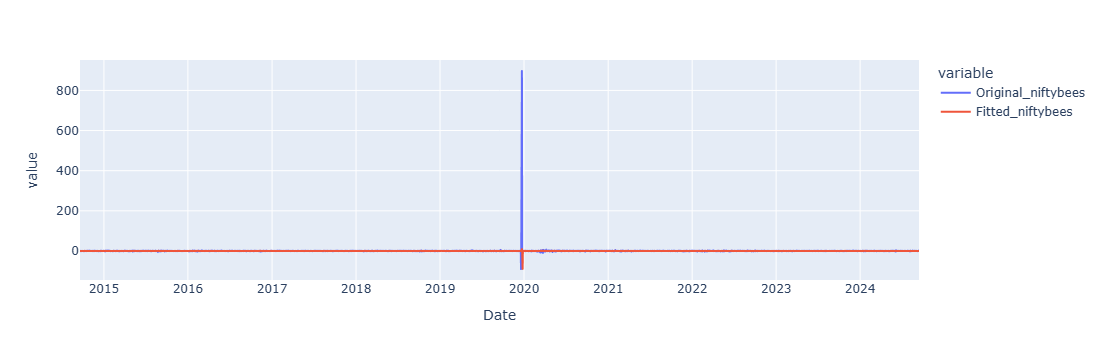

In [90]:
fig = px.line(
    data_frame=orig_fit_model1,
    x=orig_fit_model1.index,
    y=["Original_niftybees","Fitted_niftybees"]
)
fig.show()

In [ ]:
# High variance in original data as compared to fitted values

In [105]:
# Split
# train test split
y = niftybees_pct
threshold = int(len(y)*0.95) #955 of teh data into train
y_train = niftybees_pct.iloc[:int(len(niftybees_pct)*0.95)]
y_test = niftybees_pct.iloc[int(len(niftybees_pct)*0.95):]

In [107]:
#Baseline model

y_baseline = y_train.mean()
y_pred_base = [y_baseline]*len(y_train)
mae_base = mean_absolute_error()

0.39630284513383607